<a href="https://colab.research.google.com/github/Geez-l/Project_197/blob/glee-branch/ML_algorithms/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

#### Other libraries #####
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder


# Read the dataset from github

In [137]:
## from github
url = "https://raw.githubusercontent.com/Geez-l/Project_197/glee-branch/dataset/dataset.csv"
dataset = pd.read_csv(url)

dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


In [138]:
dataset.columns

Index(['Date', 'Croptype', 'Province', 'Area', 'Production', 'Yield'], dtype='object')

In [139]:
dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


# Create features from the date


In [187]:
def create_features(dataset):


    # creating a copy
    dataset1 = dataset.copy()

    # convert 'Date' column to datetime, coercing errors to NaT (Not a Time)
    dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

    # extracting year, month, quarter from Date
    dataset['Year'] = dataset['Date'].dt.year
    dataset['Month'] = dataset['Date'].dt.month
    dataset['Quarter'] = dataset['Date'].dt.quarter

    return dataset

dataset1 = create_features(dataset)
dataset1.head()


,Date,Croptype,Province,Area,Production,Yield,Year,Month,Quarter
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918,1987,1,1
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229,1987,1,1
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857,1987,1,1
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857,1987,1,1
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637,1987,1,1


# One hot encoding for categorical variable

In [188]:
unique = dataset1['Croptype'].unique()
print(unique)

unique1 = dataset1['Province'].unique()
print(unique1)

['Irrigated Palay' 'Rainfed Palay' 'Palay' 'White Corn' 'Yellow Corn'
 'Corn']
['Aklan' 'Antique' 'Capiz' 'Guimaras' 'Iloilo']


## One Hot Encoding of Crop Type and Province that has categorical variables

In [189]:
encoding = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encode_data = encoding.fit_transform(dataset1[['Croptype', 'Province']])

dataset1 = pd.concat([dataset1.reset_index(drop=True), encode_data.reset_index(drop=True)], axis=1)
dataset1 = dataset1.drop(columns=['Croptype', 'Province'])

In [190]:
dataset1.head()

,Date,Area,Production,Yield,Year,Month,Quarter,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Aklan,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo
0,1987-01-01,6130.0,19309.0,3.149918,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1987-01-01,9030.0,28275.0,3.131229,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1987-01-01,6300.0,18540.0,2.942857,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1987-01-01,6300.0,18540.0,2.942857,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1987-01-01,21270.0,58187.0,2.735637,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Assigning features (x) and target (y)

In [191]:
dataset1.columns

Index(['Date', 'Area', 'Production', 'Yield', 'Year', 'Month', 'Quarter',
       'Croptype_Corn', 'Croptype_Irrigated Palay', 'Croptype_Palay',
       'Croptype_Rainfed Palay', 'Croptype_White Corn', 'Croptype_Yellow Corn',
       'Province_Aklan', 'Province_Antique', 'Province_Capiz',
       'Province_Guimaras', 'Province_Iloilo'],
      dtype='object')

In [192]:
x = dataset1[['Area','Month','Year','Quarter']]
y = dataset1['Production']

# Split the data

In [193]:
from sklearn.model_selection import train_test_split

# train-test split, shuffle set to none when dealing TS
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=False)


In [203]:
var_corr = pd.concat([x_train, y_train], axis=1)
var_corr.head()

,Area,Month,Year,Quarter,Production
0,6130.0,1,1987,1,19309.0
1,9030.0,1,1987,1,28275.0
2,6300.0,1,1987,1,18540.0
3,6300.0,1,1987,1,18540.0
4,21270.0,1,1987,1,58187.0


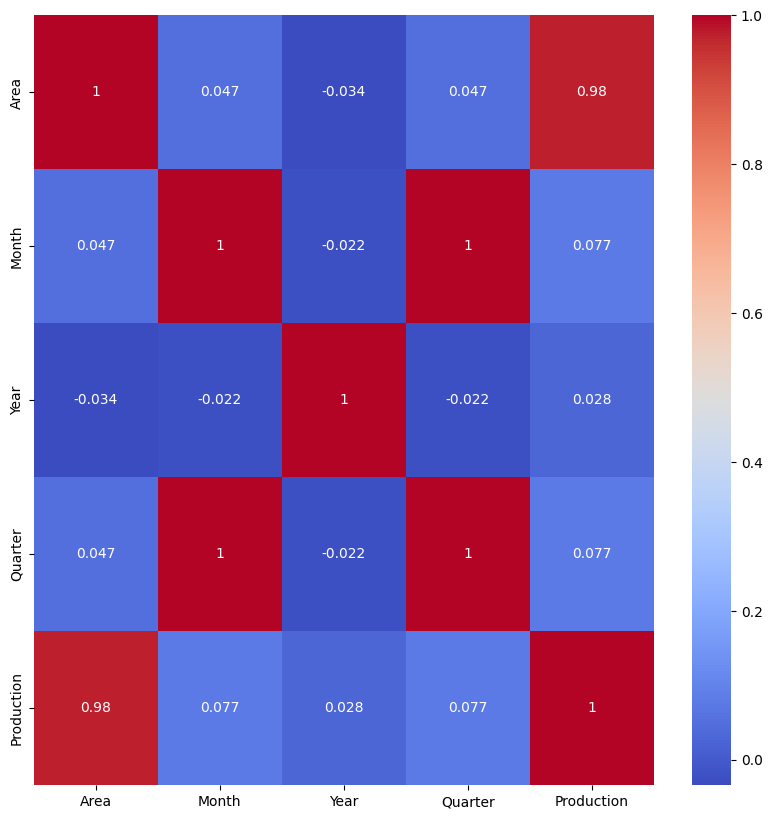

In [204]:
## correlation matrix with heatmap

corr = var_corr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Visualization of the splitting of the train and test dataset

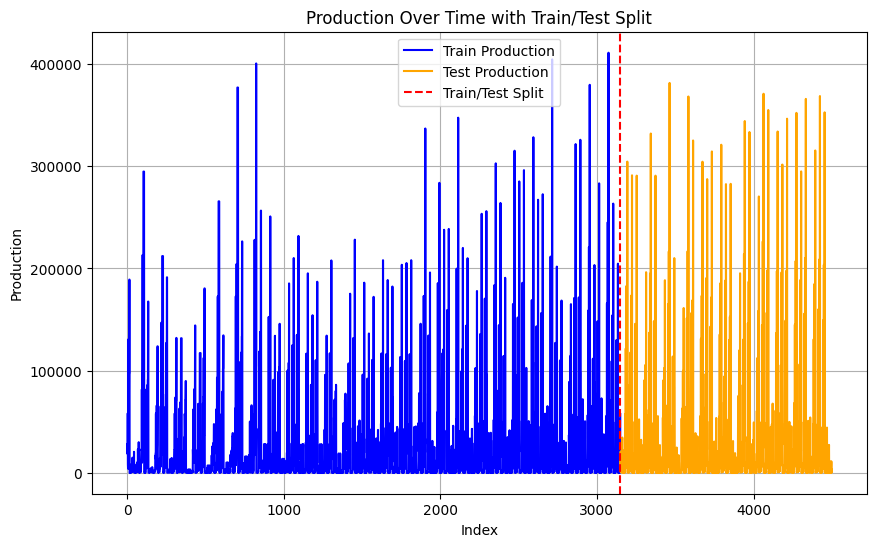

In [205]:
import matplotlib.pyplot as plt

# calculate the indices for the split point
split_index = len(x_train)

# train
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train.values, label='Train Production', color='blue')

# test
plt.plot(y_test.index, y_test.values, label='Test Production', color='orange')

# vertical line for the train/test split
plt.axvline(x=split_index, color='red', linestyle='--', label='Train/Test Split')

# labels and title
plt.xlabel('Index')
plt.ylabel('Production')
plt.title('Production Over Time with Train/Test Split')

plt.legend()
plt.grid(True)
plt.show()


# Linear Regression

# a) scale ; b) fit ; c) predict

scale


In [211]:
# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

fit

In [214]:
# Initializing and fit the model
linearRegression = LinearRegression()
linearRegression.fit(x_train_scaled, y_train)
linearRegression.score(x_train_scaled, y_train)

0.9563443496298111

predict

In [215]:
# Evaluate the model on the test set
y_pred = linearRegression.predict(x_test_scaled)
y_pred

array([10976.36079628, 18874.08389037, 19980.40227026, ...,
       16537.19080592,  9272.07213921, 12312.07213921])

### Applying cross-fold validation using Kfold to measure accuracy

In [220]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

CV  = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(linearRegression, x_train_scaled, y_train, cv=CV)
print(scores)

print(f'Mean Scores: {scores.mean()}')

[0.95297328 0.96313685 0.97274521 0.95660637 0.94069396 0.95422917
 0.94851438 0.94163793 0.94642705 0.97150022]
Mean Scores: 0.9548464431908312


### Applying Cross Validation - ShuffleSplit to measure accuracy

In [223]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

CV1 = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
cross_val_score(linearRegression, x_train_scaled, y_train, cv=CV1)
print(scores)

print(f'Mean Scores: {scores.mean()}')

[0.95297328 0.96313685 0.97274521 0.95660637 0.94069396 0.95422917
 0.94851438 0.94163793 0.94642705 0.97150022]
Mean Scores: 0.9548464431908312


# Finding the best model through GridSearchCV

In [229]:
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


def find_best_model_using_gridsearchcv(x,y):
  algorithms ={
      'linear_regression':{
          'model': LinearRegression(),
          'params':{
              'fit_intercept':[True, False]
          }
      },
      'ridge_regression':{
          'model': Ridge(),
          'params':{
              'alpha':[1,2],
              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
          },
      },
      'lasso_regression':{
          'model': Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['cyclic', 'random']
          },
      },
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=0)
  for algo, config in algorithms.items():
    GridSearch = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    GridSearch.fit(x,y)
    scores.append({
        'model': algo,
        'best_score': GridSearch.best_score_,
        'best_params': GridSearch.best_params_
    })

  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

,model,best_score,best_params
0,linear_regression,0.965813,{'fit_intercept': True}
1,ridge_regression,0.965813,"{'alpha': 2, 'solver': 'auto'}"
2,lasso_regression,0.965813,"{'alpha': 2, 'selection': 'random'}"


### Applying the hyperparameters

a) Linear Regression

In [246]:
linearRegression = LinearRegression(fit_intercept=False)
linearRegression.fit(x_train_scaled, y_train)
y_predict = linearRegression.predict(x_test_scaled)
print(f'Linear Regression score:',(linearRegression.score(x_train_scaled, y_train)))
print(f'Linear Regression model:',(linearRegression.coef_))

Linear Regression score: 0.6906975907560677
Linear Regression model: [ 4.96796357e+04  1.85147194e+18  2.75200000e+03 -1.85147194e+18]


In [247]:
LR_comparison_Df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
LR_comparison_Df

,Actual,Predicted
3150,8199.00,-15672.824707
3151,18263.00,-7775.101613
3152,20998.00,-6668.783233
3153,331.00,-22232.539709
3154,18584.00,-5597.218310
...,...,...
4495,284.00,-18301.789667
4496,3787.29,-15782.164037
4497,11107.34,-11157.058140
4498,56.00,-18560.000000


b) Lasso Regression

In [248]:
lasso = Lasso(alpha = 2, selection = 'random')
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)
print(f'Lasso score:',(lasso.score(x_train_scaled, y_train)))
print(f'Lasso model:',(lasso.coef_))

Lasso score: 0.9564318913566302
Lasso model: [49677.6600405     61.18594895  3174.4727642   1617.04427063]


In [249]:
lasso_comparison_DF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
lasso_comparison_DF

,Actual,Predicted
3150,8199.00,10624.571464
3151,18263.00,18521.980475
3152,20998.00,19628.254858
3153,331.00,4065.117334
3154,18584.00,20699.777166
...,...,...
4495,284.00,8609.079412
4496,3787.29,11128.604839
4497,11107.34,15753.526801
4498,56.00,8481.655137


c) Ridge Regression

In [251]:
ridge = Ridge(alpha = 2, solver = 'auto')
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
print(f'Ridge score:',(ridge.score(x_train_scaled, y_train)))
print(f'Ridge model:',(ridge.coef_))

Ridge score: 0.956431508144324
Ridge model: [49647.96575851   840.53264831  3173.30363557   840.5326483 ]


In [252]:
ridge_comparison_DF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
ridge_comparison_DF

,Actual,Predicted
3150,8199.00,10633.588660
3151,18263.00,18526.277081
3152,20998.00,19631.890201
3153,331.00,4078.055373
3154,18584.00,20702.772018
...,...,...
4495,284.00,8620.358571
4496,3787.29,11138.377979
4497,11107.34,15760.535445
4498,56.00,8493.010463


### Evaluation Metrics

In [258]:
# Revert to original data before scaling for evaluation
x_train_original = scaler.inverse_transform(x_train_scaled)
x_test_original = scaler.inverse_transform(x_test_scaled)

In [259]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
mape = mean_absolute_percentage_error(y_test, y_predict)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'MAPE: {mape}')

MSE: 692740941.8959496
MAE: 24614.016463096174
R2: 0.8012727001645111
MAPE: 182.61836624910694


In [260]:
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
mape = mean_absolute_percentage_error(y_test, y_pred_lasso)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'MAPE: {mape}')

MSE: 91750275.12058583
MAE: 7338.830433434731
R2: 0.9736795050917953
MAPE: 45.39032725735078


In [263]:
mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'MAPE: {mape}')

MSE: 92169902.58525799
MAE: 7352.1199448244615
R2: 0.9735591261334463
MAPE: 45.50004000963551
